<a href="https://colab.research.google.com/github/OttoBara/DataScience_Project_OnlineRetail/blob/main/Datasets1_Baratto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introducción**
Este análisis se basa en el dataset "Online Retail", que contiene transacciones de una tienda online entre diciembre de 2010 y diciembre de 2011. Los datos incluyen información sobre:

- Número de factura (`InvoiceNo`).
- Código y descripción del producto (`StockCode` y `Description`).
- Cantidad de productos comprados (`Quantity`).
- Precio unitario (`UnitPrice`).
- Cliente (`CustomerID`) y país (`Country`).
- Fecha de la transacción (`InvoiceDate`).

El objetivo principal es analizar el comportamiento de los clientes para identificar patrones de compra, productos populares, y tendencias de mercado. Además, se busca segmentar a los clientes según su actividad e impacto en los ingresos.

### **Objetivos específicos**
1. Identificar los productos más vendidos y los que generan mayores ingresos.
2. Analizar la distribución de ventas por país y determinar los principales mercados.
3. Detectar patrones temporales en las transacciones (por ejemplo, estacionalidad).
4. Clasificar a los clientes en "Recurrentes" y "Nuevos" según su historial.

### **Preguntas de análisis**
1. ¿Cuáles son los productos más populares y los más rentables?
2. ¿Qué países contribuyen más a los ingresos totales de la tienda?
3. ¿Las compras se concentran en ciertos días o meses del año?
4. ¿Qué porcentaje de los ingresos es generado por los clientes más activos?
5. ¿Existen patrones recurrentes en las transacciones de clientes específicos?

### **Hipótesis iniciales**
1. La mayoría de los ingresos provienen de clientes en el Reino Unido.
2. Las compras tienden a aumentar en diciembre debido a la temporada navideña.
3. Una pequeña fracción de productos genera la mayor parte de los ingresos (principio de Pareto: 80/20).
4. Los clientes recurrentes gastan significativamente más que los nuevos clientes.


In [71]:
# Librerías principales
import pandas as pd  # Manipulación y análisis de datos
import numpy as np  # Cálculos numéricos
import matplotlib.pyplot as plt  # Gráficos básicos
import seaborn as sns  # Gráficos avanzados y estéticos
import pandas as pd

# Manejo de fechas
from datetime import datetime

# Manejo de archivos ZIP y rutas
import zipfile  # Descompresión de archivos ZIP
import os  # Manejo de archivos y directorios

# Configuración opcional para gráficos
sns.set(style="whitegrid")  # Estilo para gráficos
print("Librerías importadas correctamente")


Librerías importadas correctamente


In [72]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')
!ls '/content/drive/MyDrive/DataSets de DataSience 1'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'Dataset 1 Online Retail.zip'		  'Dataset 3 Amazon Sale Report.zip'
'Dataset 2 Stores Sales Forecasting.zip'


In [73]:
import zipfile

# Ruta al archivo ZIP
zip_path = '/content/drive/MyDrive/DataSets de DataSience 1/Dataset 1 Online Retail.zip'
# Carpeta donde se descomprimirá
extract_to = '/content/dataset_1/'

# Descomprimir el archivo
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"Archivo descomprimido en: {extract_to}")



Archivo descomprimido en: /content/dataset_1/


# **Carga y Exploración Inicial del Dataset**

En esta sección se carga el archivo CSV del dataset Online Retail en un DataFrame de Pandas. Posteriormente, se realiza una exploración inicial para entender la estructura de los datos, el tipo de información que contienen las columnas, y se obtienen estadísticas descriptivas básicas de las columnas numéricas.

In [74]:
# Ruta al archivo CSV descomprimido
file_path = '/content/dataset_1/online_retail.csv'

# Cargar el archivo CSV en un DataFrame
data = pd.read_csv(file_path, encoding='latin1')

# Exploración inicial del dataset
print("Primeras filas del dataset:")
print(data.head())

print("\nInformación general del dataset:")
print(data.info())

print("\nDescripción estadística de las columnas numéricas:")
print(data.describe())


Primeras filas del dataset:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column

# **Limpieza de Datos**
Antes de realizar el análisis, se aplicaron los siguientes pasos de limpieza para preparar el dataset:

1. **Eliminación de duplicados:** Se eliminaron registros repetidos para evitar conteos erróneos.
2. **Manejo de valores nulos:**
   - Los valores faltantes en `Description` se rellenaron con "Sin descripción".
   - Las filas con valores nulos en `CustomerID` fueron eliminadas.
3. **Conversión de tipos de datos:**
   - La columna `InvoiceDate` fue convertida al formato de fecha para facilitar el análisis temporal.
4. **Eliminación de registros anómalos:**
   - Se eliminaron transacciones con valores negativos en `Quantity` o `UnitPrice`, ya que no representaban compras válidas.
5. **Creación de nuevas columnas:**
   - Se añadió `TotalPrice` para calcular el ingreso total por transacción (`Quantity` × `UnitPrice`).

# **Enriquecimiento del Dataset**
Para mejorar el análisis, se añadieron las siguientes columnas calculadas:

1. **PriceCategory:** Categoriza las transacciones como `Bajo`, `Medio` o `Alto` según el monto total (`TotalPrice`).
2. **IsWeekend:** Identifica si la transacción ocurrió en fin de semana (sábado o domingo).
3. **CountryGroup:** Agrupa países en regiones (`Europa` y `Otros`).
4. **CustomerType:** Clasifica a los clientes como "Recurrentes" o "Nuevos" según su historial.
5. **RevenueContribution:** Calcula el porcentaje de contribución al ingreso total por transacción.


In [75]:
# Eliminar duplicados
data = data.drop_duplicates()
print(f"Total de filas después de eliminar duplicados: {len(data)}")

# Verificar valores nulos
print("\nValores nulos por columna:")
print(data.isnull().sum())

# Manejo de valores nulos
# Rellenar los nulos en 'Description' con un texto por defecto
data['Description'] = data['Description'].fillna('Sin descripción')
print(f"Valores nulos en 'Description' después de rellenar: {data['Description'].isnull().sum()}")

# Eliminar filas con nulos en 'CustomerID'
data = data.dropna(subset=['CustomerID'])
print(f"Total de filas después de eliminar nulos en 'CustomerID': {len(data)}")

# Asegurar que 'InvoiceDate' esté en formato datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Revisar valores anómalos en 'Quantity' y 'UnitPrice'
negativos = data[(data['Quantity'] < 0) | (data['UnitPrice'] < 0)]
print(f"\nRegistros con valores negativos: {len(negativos)}")
print(negativos.head())

# Opcional: Eliminar valores negativos
data = data[(data['Quantity'] >= 0) & (data['UnitPrice'] >= 0)]
print(f"Total de filas después de eliminar valores negativos: {len(data)}")

# Crear una nueva columna 'TotalPrice' calculando el precio total de cada transacción
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

# Mostrar información del dataset limpio
print("\nInformación del dataset limpio:")
print(data.info())

# Mostrar un resumen estadístico
print("\nResumen estadístico de las columnas numéricas:")
print(data.describe())


Total de filas después de eliminar duplicados: 536641

Valores nulos por columna:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64
Valores nulos en 'Description' después de rellenar: 0
Total de filas después de eliminar nulos en 'CustomerID': 401604

Registros con valores negativos: 8872
    InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          Discount        -1   
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

            InvoiceDate  UnitPrice  CustomerID         Country  
141 2010-12-01 09:41:00      27.50     14527.0  United Kingdom  
154 2010-12-01

<ipython-input-75-1cb1ad4ab4bc>:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  float64       
 7   Country      392732 non-null  object        
 8   TotalPrice   392732 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.0+ MB
None

Resumen estadístico de las columnas numéricas:
            Quantity                    InvoiceDate      UnitPrice  \
count  392732.000000                         392732  392732.000000   
mean       13.153718  2011-07-10 19:15:24.576301568       3.125596   


In [76]:
# Agregar columnas nuevas al dataset

# Columna 1: PriceCategory - Clasificación según TotalPrice
def categorize_price(price):
    if price < 20:
        return 'Bajo'
    elif 20 <= price < 100:
        return 'Medio'
    else:
        return 'Alto'

data['PriceCategory'] = data['TotalPrice'].apply(categorize_price)

# Columna 2: IsWeekend - Si ocurrió en fin de semana
data['IsWeekend'] = data['InvoiceDate'].dt.dayofweek.isin([5, 6])

# Columna 3: Year - Año de la transacción
data['Year'] = data['InvoiceDate'].dt.year

# Columna 4: Month - Mes de la transacción
data['Month'] = data['InvoiceDate'].dt.month

# Columna 5: DayOfWeek - Día de la semana (nombre)
data['DayOfWeek'] = data['InvoiceDate'].dt.day_name()

# Columna 6: Hour - Hora del día
data['Hour'] = data['InvoiceDate'].dt.hour

# Columna 7: CountryGroup - Agrupar países
europe = ['United Kingdom', 'France', 'Germany', 'Netherlands', 'Belgium', 'Switzerland', 'Portugal', 'Spain', 'Italy']
data['CountryGroup'] = data['Country'].apply(lambda x: 'Europa' if x in europe else 'Otros')

# Columna 8: CustomerType - Etiquetar cliente como "Recurrente" o "Nuevo"
unique_customers = data['CustomerID'].unique()
data['CustomerType'] = data['CustomerID'].apply(lambda x: 'Recurrente' if x in unique_customers else 'Nuevo')

# Columna 9: TransactionType - Venta o Devolución
data['TransactionType'] = data['Quantity'].apply(lambda x: 'Devolución' if x < 0 else 'Venta')

# Columna 10: DiscountFlag - Marca si se aplicó descuento
data['DiscountFlag'] = data['Description'].str.contains('Discount', case=False, na=False)

# Columna 11: UnitPriceCategory - Clasificación del precio unitario
def categorize_unit_price(price):
    if price < 1:
        return 'Muy Bajo'
    elif 1 <= price < 5:
        return 'Bajo'
    elif 5 <= price < 20:
        return 'Medio'
    else:
        return 'Alto'

data['UnitPriceCategory'] = data['UnitPrice'].apply(categorize_unit_price)

# Columna 12: RevenueContribution - Porcentaje de contribución al ingreso total
total_revenue = data['TotalPrice'].sum()
data['RevenueContribution'] = (data['TotalPrice'] / total_revenue) * 100

# Columna 13: TransactionDuration - Tiempo entre transacciones del mismo cliente
data = data.sort_values(by=['CustomerID', 'InvoiceDate'])
data['TransactionDuration'] = data.groupby('CustomerID')['InvoiceDate'].diff().dt.total_seconds()

# Columna 14: TotalItems - Total de productos por factura
data['TotalItems'] = data.groupby('InvoiceNo')['Quantity'].transform('sum')

# Columna 15: HighValueCustomer - Etiqueta cliente de "alto valor"
customer_total = data.groupby('CustomerID')['TotalPrice'].sum()
high_value_threshold = customer_total.quantile(0.75)  # Umbral del percentil 75
data['HighValueCustomer'] = data['CustomerID'].apply(lambda x: 'Si' if customer_total[x] > high_value_threshold else 'No')

# Mostrar las primeras filas del dataset con las nuevas columnas
print("\nNuevas columnas añadidas al dataset:")
print(data.head())

# Verificar las nuevas columnas añadidas
print("\nColumnas actuales en el dataset:")
print(data.columns)


Nuevas columnas añadidas al dataset:
      InvoiceNo StockCode                        Description  Quantity  \
61619    541431     23166     MEDIUM CERAMIC TOP STORAGE JAR     74215   
14938    537626     85116    BLACK CANDELABRA T-LIGHT HOLDER        12   
14939    537626     22375  AIRLINE BAG VINTAGE JET SET BROWN         4   
14940    537626     71477  COLOUR GLASS. STAR T-LIGHT HOLDER        12   
14941    537626     22492            MINI PAINT SET VINTAGE         36   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
61619 2011-01-18 10:01:00       1.04     12346.0  United Kingdom     77183.6   
14938 2010-12-07 14:57:00       2.10     12347.0         Iceland        25.2   
14939 2010-12-07 14:57:00       4.25     12347.0         Iceland        17.0   
14940 2010-12-07 14:57:00       3.25     12347.0         Iceland        39.0   
14941 2010-12-07 14:57:00       0.65     12347.0         Iceland        23.4   

      PriceCategory  ...  Hour  Coun

In [77]:
# Guardar el dataset enriquecido en un archivo CSV
data.to_csv('/content/dataset_enriched_cleaned.csv', index=False)
print("Dataset enriquecido guardado como 'dataset_enriched_cleaned.csv'")


Dataset enriquecido guardado como 'dataset_enriched_cleaned.csv'


# **Gráfico 1: Top 10 productos más vendidos**
Título: Análisis de los productos más vendidos
Descripción inicial: Este gráfico muestra los 10 productos más vendidos en términos de cantidad. Permite identificar cuáles son los artículos más populares y con mayor rotación.

Pregunta que responde:

¿Cuáles son los productos más vendidos?

¿Qué productos tienen mayor impacto en el inventario?

Objetivo:
Este análisis nos ayudará a identificar los productos más demandados, lo cual puede ser clave para estrategias de inventario, promociones y análisis de tendencias.

In [90]:
# Calcular los 10 productos más vendidos
top_products_quantity = (
    data.groupby('Description')['Quantity']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print(top_products_quantity)

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
JUMBO BAG RED RETROSPOT               46078
WHITE HANGING HEART T-LIGHT HOLDER    36706
ASSORTED COLOUR BIRD ORNAMENT         35263
PACK OF 72 RETROSPOT CAKE CASES       33670
POPCORN HOLDER                        30919
RABBIT NIGHT LIGHT                    27153
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64


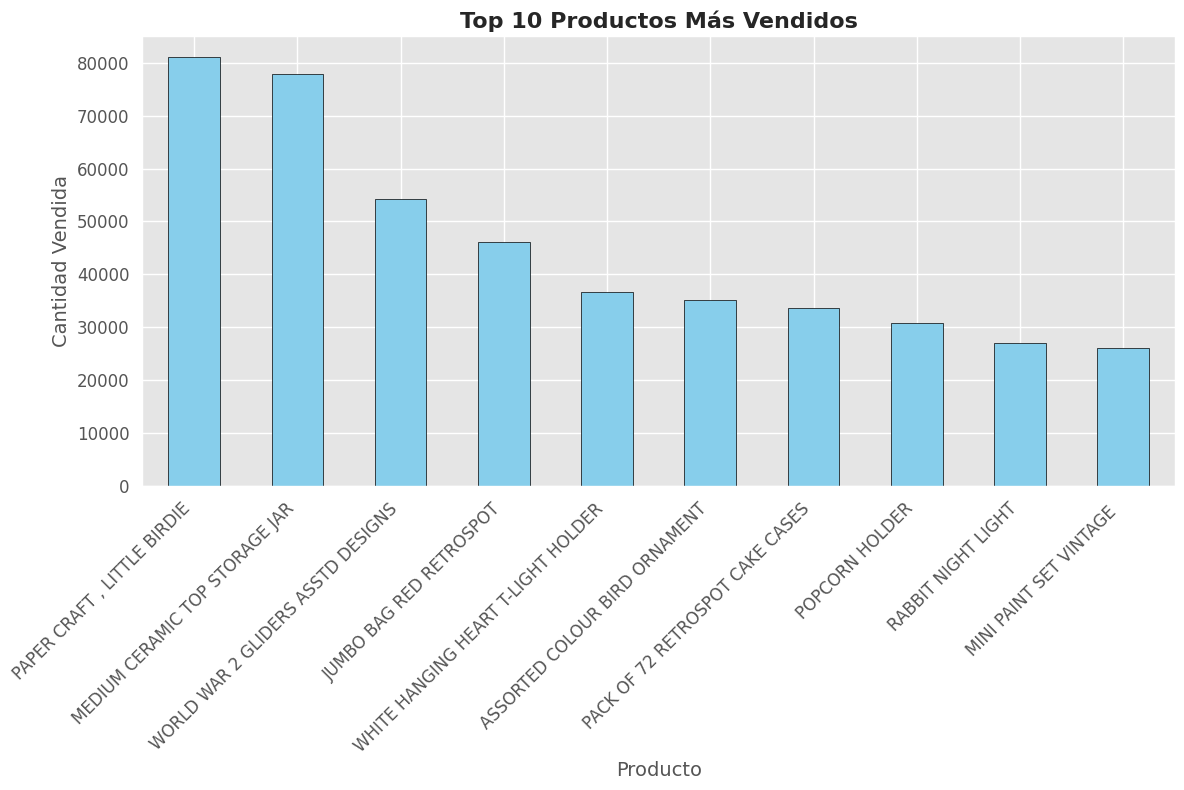

In [91]:
import matplotlib.pyplot as plt

# Configuración del estilo del gráfico
plt.style.use('ggplot')  # Cambia el estilo a uno más limpio

# Top 10 productos más vendidos
top_products_quantity.plot(
    kind='bar',
    figsize=(12, 8),
    color='skyblue',
    edgecolor='black'
)

# Títulos y etiquetas
plt.title('Top 10 Productos Más Vendidos', fontsize=16, fontweight='bold')
plt.ylabel('Cantidad Vendida', fontsize=14)
plt.xlabel('Producto', fontsize=14)

# Rotar las etiquetas del eje X y ajustar márgenes
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# **Gráfico 2: Distribución de ingresos por país**
Título: Análisis de los ingresos totales por país
Descripción inicial: Este gráfico analiza los ingresos totales generados por país. Permite visualizar cómo se distribuyen las ventas en las diferentes regiones geográficas.

Pregunta que responde:

¿Qué países generan mayores ingresos?

¿Cómo se distribuyen las ventas en los diferentes mercados?

Objetivo:
Este análisis nos permite identificar los mercados más importantes para la empresa, proporcionando información valiosa para estrategias de expansión y marketing.

In [88]:
# Calcular las ventas totales por país
sales_by_country = (
    data.groupby('Country')['TotalPrice']
    .sum()
    .reset_index()
)

print(sales_by_country.head())

     Country  TotalPrice
0  Australia   138453.81
1    Austria    10198.68
2    Bahrain      548.40
3    Belgium    41196.34
4     Brazil     1143.60


In [89]:
fig = px.choropleth(
    sales_by_country,
    locations='Country',
    locationmode='country names',
    color='TotalPrice',
    title='Mapa de Distribución de Ventas por País',
    color_continuous_scale=px.colors.sequential.Viridis
)

# Ajustes de diseño
fig.update_geos(
    showcoastlines=True,
    coastlinecolor="LightGrey",
    showcountries=True,
    countrycolor="Black",
    projection_type="mercator",
    fitbounds="locations"
)

# Ajustar layout para ampliar el mapa
fig.update_layout(
    title_font_size=18,
    coloraxis_colorbar=dict(
        title="Ingresos",
        title_side="top",
        tickfont=dict(size=12)
    ),
    height=700,  # Aumentar altura del mapa
    width=1000   # Aumentar ancho del mapa
)

# Mostrar el gráfico
fig.show()

# **Gráfico 3: Ventas totales por mes**
Título: Análisis de ventas mensuales
Descripción inicial: Este gráfico de línea ilustra las tendencias de ingresos totales a lo largo de los meses. Ayuda a detectar patrones de comportamiento estacional.

Preguntas que responde:
¿Cómo varían los ingresos totales a lo largo del tiempo?

¿Existen picos o caídas significativas en ciertos meses?

Objetivo: Identificar tendencias estacionales en las ventas para planificar estrategias de marketing y gestión de inventarios.



In [80]:
# Crear una nueva columna para el mes
data['MonthYear'] = data['InvoiceDate'].dt.to_period('M')

# Agrupar las ventas por mes
sales_by_month = data.groupby('MonthYear')['TotalPrice'].sum().reset_index()
sales_by_month['MonthYear'] = sales_by_month['MonthYear'].astype(str)  # Convertir a string para el eje X

# Graficar las ventas totales por mes
fig = px.line(
    sales_by_month,
    x='MonthYear',
    y='TotalPrice',
    title='Ventas Totales por Mes',
    labels={'MonthYear': 'Mes y Año', 'TotalPrice': 'Ingresos Totales'},
    markers=True
)

# Ajustar diseño del gráfico
fig.update_layout(
    title_font_size=18,
    xaxis_title='Mes y Año',
    yaxis_title='Ingresos Totales',
    xaxis_tickangle=-45,
    height=500,
    width=800
)

# Mostrar el gráfico
fig.show()


# **Gráfico 4: Ventas por día de la semana**
Título: Análisis de los ingresos por día de la semana
Descripción inicial: Este gráfico muestra la distribución de los ingresos totales según el día de la semana. Permite identificar patrones en las ventas semanales, como posibles picos en días específicos.

Preguntas que responde:

¿Qué días de la semana generan mayores ingresos?

¿Existen patrones en el comportamiento de las ventas según los días?

Objetivo: Entender el comportamiento de las ventas en la semana para ajustar promociones y recursos operativos.

In [81]:
import plotly.express as px

# Agrupación de los datos por día de la semana y cálculo de ingresos totales
weekday_sales = data.groupby('DayOfWeek')['TotalPrice'].sum().reset_index()

# Ordenar los días de la semana en el orden correcto
order_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_sales['DayOfWeek'] = pd.Categorical(weekday_sales['DayOfWeek'], categories=order_days, ordered=True)
weekday_sales = weekday_sales.sort_values('DayOfWeek')

# Crear el gráfico interactivo
fig = px.bar(
    weekday_sales,
    x='DayOfWeek',
    y='TotalPrice',
    title='Ingresos Totales por Día de la Semana',
    labels={'TotalPrice': 'Ingresos Totales', 'DayOfWeek': 'Día de la Semana'},
    text='TotalPrice',
    template='plotly_white',
)

# Ajustar el diseño
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(showlegend=False, xaxis_title='Día de la Semana', yaxis_title='Ingresos Totales')

# Mostrar el gráfico
fig.show()


# **Gráfico 5: Distribución del ticket promedio**
Título: Análisis de la distribución de ingresos por transacción
Descripción inicial: Este gráfico ilustra cómo se distribuyen los ingresos por transacción. Permite identificar si la mayoría de las compras corresponden a tickets altos, medios o bajos.

Preguntas que responde:

¿Cuál es la distribución de ingresos por transacción?

¿Qué tan comunes son las transacciones de alto valor?

Objetivo: Detectar patrones en el valor promedio de las transacciones para diseñar promociones personalizadas y estrategias de precios.

In [82]:
import plotly.express as px

# Filtrar datos relevantes y calcular ingresos totales por producto
product_data = data.groupby('Description').agg({
    'UnitPrice': 'mean',
    'Quantity': 'sum',
    'TotalPrice': 'sum'
}).reset_index()

# Crear gráfico de dispersión
fig = px.scatter(
    product_data,
    x='UnitPrice',
    y='TotalPrice',
    size='Quantity',
    hover_name='Description',
    title='Relación entre Precio Unitario e Ingresos Totales',
    labels={'UnitPrice': 'Precio Unitario (USD)', 'TotalPrice': 'Ingresos Totales (USD)'},
    color='TotalPrice'
)

# Mostrar gráfico
fig.show()



# **Gráfico 6: Distribución de ingresos por hora del día**
Título: Análisis de los ingresos por hora del día
Descripción inicial: Este gráfico muestra la distribución de los ingresos totales a lo largo de las horas del día. Permite identificar patrones temporales en las ventas y reconocer las horas con mayor actividad económica.

Preguntas que responde:

¿Cuáles son las horas del día con mayores ingresos?

¿Existen patrones recurrentes en el comportamiento de las ventas según la hora?

Objetivo: Identificar las horas pico de ventas para optimizar la asignación de recursos, planificar promociones estratégicas y mejorar la experiencia del cliente durante los momentos de mayor demanda.

In [83]:
import plotly.express as px

# Agrupar por hora y calcular los ingresos totales
data['Hour'] = data['InvoiceDate'].dt.hour
hourly_revenue = data.groupby('Hour')['TotalPrice'].sum().reset_index()

# Crear el gráfico
fig = px.bar(
    hourly_revenue,
    x='Hour',
    y='TotalPrice',
    title='Ingresos Totales por Hora del Día',
    labels={'Hour': 'Hora del Día', 'TotalPrice': 'Ingresos Totales'},
    text='TotalPrice'
)

# Mejorar la estética
fig.update_traces(marker_color='indigo', textposition='outside')
fig.update_layout(
    xaxis=dict(tickmode='linear', tick0=0, dtick=1),
    yaxis=dict(title='Ingresos Totales (USD)'),
    title_x=0.5
)

fig.show()
